# United States Medical Insurance Data Analysis Portfolio Project

## 1. Introduction

In the United States of America, medical insurance is a key monthly/yearly consideration for citizens. With the cost of services always on the rise, having the right coverage is critical to receiving appropriate care. This project will seek to analyse billing information from around the United States. The main goal of the project will be to develop and train a predictive model that will be able to accurately predict a yearly insurance costs for new customers.

### 1.1 Data Source

The data was downloaded from Codecademy as part of their Data Scientist: Analytics/Machine Learning Professional Certication courses. While the data is simulated, it was generated to reflect real world data.

### 1.2 The Dataset

The dataset for this project consists of one data file: `insurance.csv`. This data file consists of the following features/variables:

- `age`: The age in years of the client.
- `sex`: The sex of the client.
- `bmi`: The Body Mass Index (bmi) of the client
- `children`: The number of children of the client.
- `smoker`: Whether the client smokes.
- `region`: The region the client resides in.

### 1.3 Technology

The data will be analyzed primarily using Python in the Jupyter Notebook implementation. The data will be imported into a `pandas` dataframe object and prepared for analysis. `sklearn` modules will be used to develop and train a machined learning module for predicitve analysis. Data visualizations will be performed using the `matplotlib.pyplot` and `seaborn` libraries.

## 2. Project Scoping

**Main Goal**: Develop and and train a predictive machine learning model for future clients.

**Sub-Goals**:

1. Import and inspect the data.
2. Determine if features are quantititive or qualitative.
3. Visualize individaul feature frequency distritributions.
4. Determine which features have the strongest relationship to the charges paid by the clients.
5. Use those features to develop an accurate model for predicting future clients charges.

## 3. Exploratory Data Analysis

### 3.1 Importing and Inspecting the Dataset

In [1]:
import pandas as pd

insurance_df = pd.read_csv('insurance.csv')

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
insurance_df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


At first glance, the data already appears to be clean. There are 1338 records in each of the seven features and none of them appear to be null valued. The age column is integer values, as one would expect for age reported in years. Values in this column appear to be reasonable with no significant outliers.

The sex column contains two unique values. Because male is the most frequent, I suspect that female will be the other option.

The bmi data is a continuous numerical feature (given by the `float64` dtype). Without seeing what the data distribution looks like, it is hard to tell if a maximum value of 51.13 is a significant outlier. I will need to investigate this further.

The children feature reports the number of children the client has. It is integer valued and ranges from 0 to 5 children.

The smoker data consists of a binary categorical variable. Based on `no` being the most frequent value, I assume `yes` is the other option.

The region data also appears to be categorical with four unique values. It is not immediately obvious by the `.describe()` method what those values are, although `southeast` appears to be most common.

The charges data is another continuous feature. Based on the `.describe()` method results, I would expect the maximum value of 63770.428010 to be a significant outlier as it is ~3.8x the 3$^{rd}$ quartile.

Because I would like to predict what future clients will be paying in anual insurance costs, I will be using the charges feature as my outcome feature. The other features will be used as predictors. I expect the most relevant features to be age, bmi and smoker as these three features tend to increased risks for a variety of different diseases.

### 3.2 Visualizing Individual Feature Distributions

Before I can visualize each feature's data distribution, I need to separate my numerical and categorical features. In the cases of age, bmi, charges, smoker and region this is a very easy to call to make. The problem arises when looking at the children feature. Because this feature only takes six unique integer values, treating it like a numerical value doesn't make much sense. For the purposes of this project, I will treat any numerical feature that has less than 20 unique values as qualitative. I will now create a function to separate the features into their appropriate feature types.

Separating the features into the appropriate feature type is important because it will determine what plots I am able to use in future analyses.

In [4]:
def num_or_cat(df):
    '''
    This function will take an input dataframe object and
    append the feature column names to a dict. The feature
    names will be separated into num and cat keys.
    
    df = input dataframe object
    '''
    num_list = [] ### initializing list for numerical features
    cat_list = [] ### initializing list for categorical features
    for feature in df.columns:
        if df[feature].nunique() > 20:
            num_list.append(feature)
        else:
            cat_list.append(feature)
    feature_dict = {'num': num_list, 'cat': cat_list}
    return feature_dict

feature_dict = num_or_cat(insurance_df)
print(feature_dict)

{'num': ['age', 'bmi', 'charges'], 'cat': ['sex', 'children', 'smoker', 'region']}


With my features now separated into numerical and categorical dictionary keys, I can perform some preliminary data distribution visualizations. This will take the form of histograms and count plots for the numerical and categorical data repsectively.

<IPython.core.display.Javascript object>


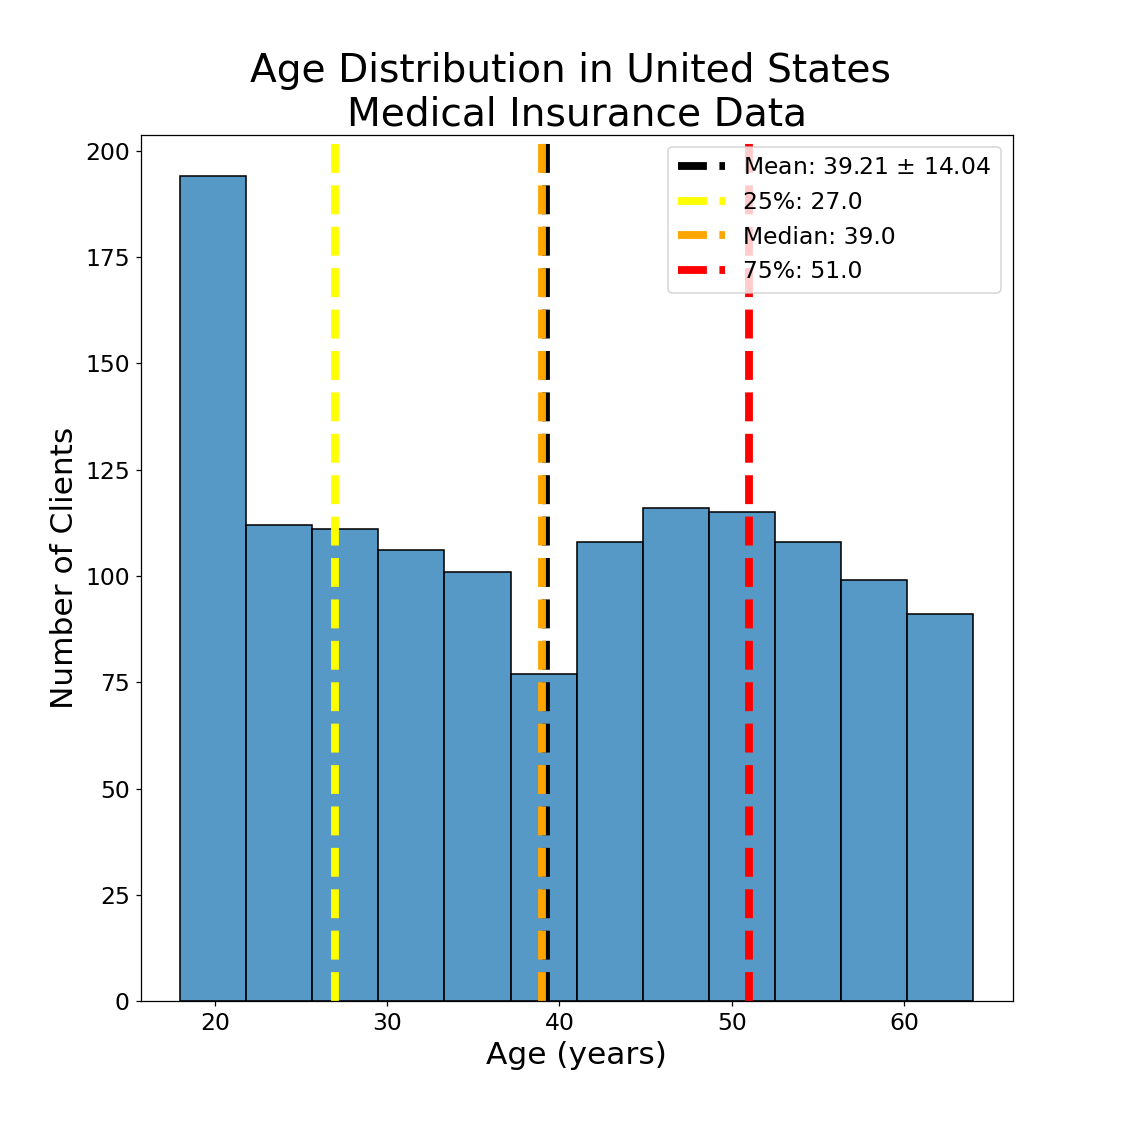

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib notebook

fig, ax = plt.subplots(figsize = (10,10))

sns.histplot(
    x = 'age',
    data = insurance_df,
    ax = ax
)

ax.axvline(np.mean(insurance_df.age), linestyle = '--', linewidth = 5, color = 'black',
           label = f'Mean: {np.mean(insurance_df.age).round(2)} $\pm$ {np.std(insurance_df.age).round(2)}')

ax.axvline(np.percentile(insurance_df.age, 25), linestyle = '--', linewidth = 5, color = 'yellow',
           label = f'25%: {np.percentile(insurance_df.age, 25)}')

ax.axvline(np.median(insurance_df.age), linestyle = '--', linewidth = 5, color = 'orange',
           label = f'Median: {np.median(insurance_df.age)}')

ax.axvline(np.percentile(insurance_df.age, 75), linestyle = '--', linewidth = 5, color = 'red',
           label = f'75%: {np.percentile(insurance_df.age, 75)}')

ax.set_title('Age Distribution in United States \nMedical Insurance Data', fontsize = 25)
ax.set_ylabel('Number of Clients', fontsize = 20)
ax.set_xlabel('Age (years)', fontsize = 20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.legend(fontsize = 15)
plt.show()

Rewriting the above for six more features would be cumbersome. Instead, I will create a function to so this for me.

In [6]:
def dist_viz(df):
    '''
    This function will produce a visualization of the 
    data distribution for each feature contained within
    the input dataframe object.
    
    df = input dataframe object
    '''
    feature_dict = num_or_cat(df)
    for feature in df.columns:
        
        fig, ax = plt.subplots(figsize = (10,10))
        
        if feature in feature_dict['num']:
            
            sns.histplot(
                x = feature,
                data = df,
                ax = ax
            )

            ax.axvline(np.mean(df[feature]), linestyle = '--', linewidth = 5, color = 'black',
                       label = f'Mean: {np.mean(df[feature]).round(2)} $\pm$ {np.std(insurance_df[feature]).round(2)}')

            ax.axvline(np.percentile(df[feature], 25), linestyle = '--', linewidth = 5, color = 'yellow',
                       label = f'25%: {np.percentile(df[feature], 25).round(2)}')

            ax.axvline(np.median(df[feature]), linestyle = '--', linewidth = 5, color = 'orange',
                       label = f'Median: {np.median(df[feature]).round(2)}')

            ax.axvline(np.percentile(df[feature], 75), linestyle = '--', linewidth = 5, color = 'red',
                       label = f'75%: {np.percentile(df[feature], 75).round(2)}')

            ax.set_title(feature.title() + ' Distribution in United States \nMedical Insurance Data', fontsize = 25)
            ax.set_ylabel('Number of Clients', fontsize = 20)
            ax.set_xlabel(feature.title(), fontsize = 20)
            ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
            ax.legend(fontsize = 15)
            plt.savefig(feature + 'distplot.png')
            plt.show()
        else:
            sns.countplot(
                x = feature,
                data = df,
                edgecolor = 'black',
                order = df[feature].value_counts().index,
                ax = ax
            )
            ax.bar_label(container=ax.containers[0],
                         labels = df[feature].value_counts(normalize = True).mul(100).round(2).astype(str) + '%', size = 15)
            ax.set_title(feature.title() + ' Distribution in United States \nMedical Insurance Data', fontsize = 25)
            ax.set_ylabel('Number of Clients', fontsize = 20)
            ax.set_xlabel(feature.title(), fontsize = 20)
            ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
            plt.savefig(feature + 'distplot.png')
            plt.show()

<IPython.core.display.Javascript object>


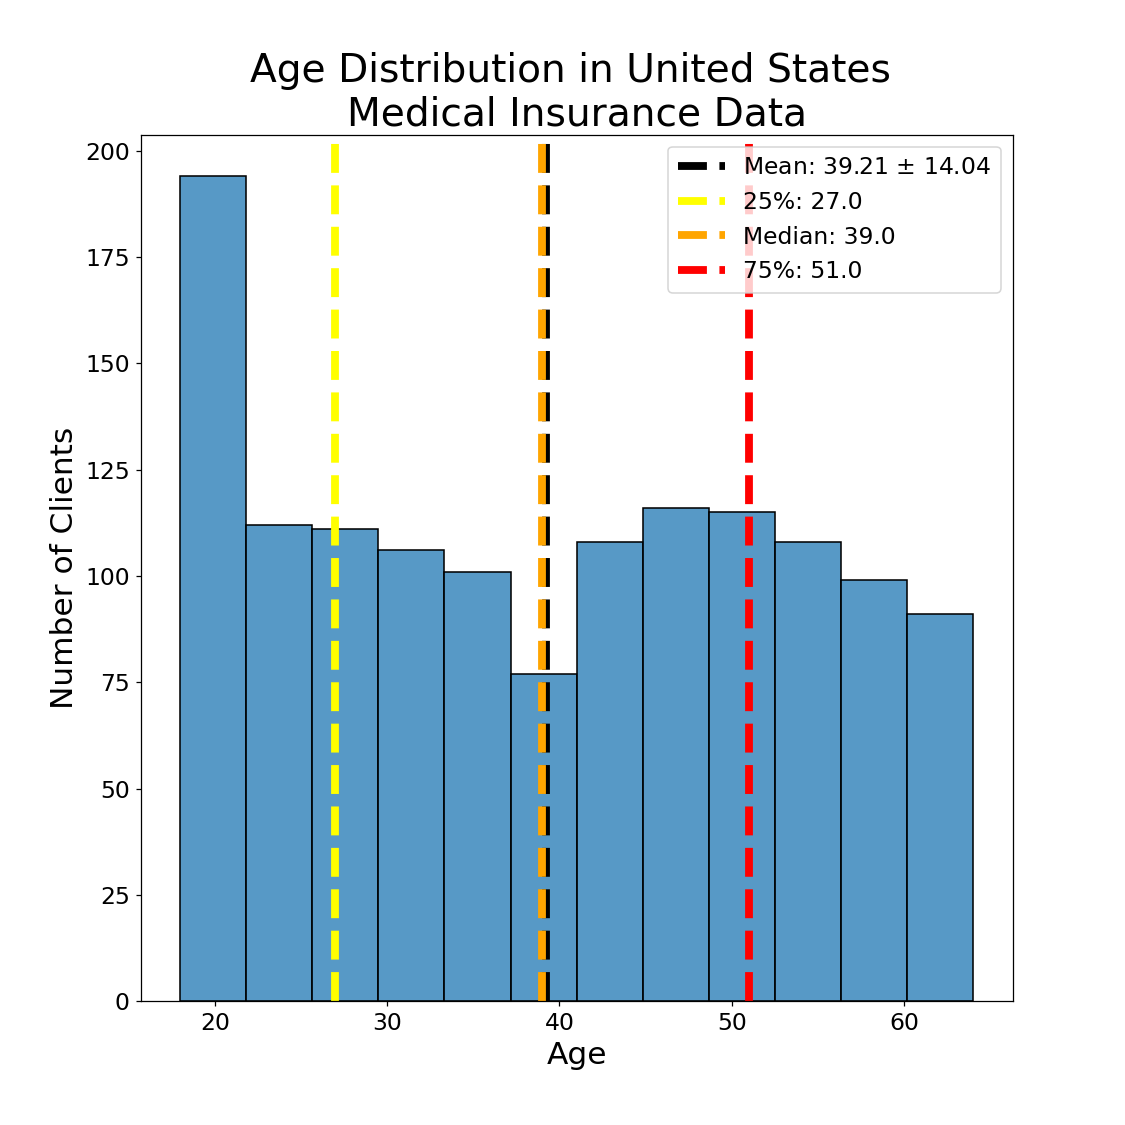

<IPython.core.display.Javascript object>


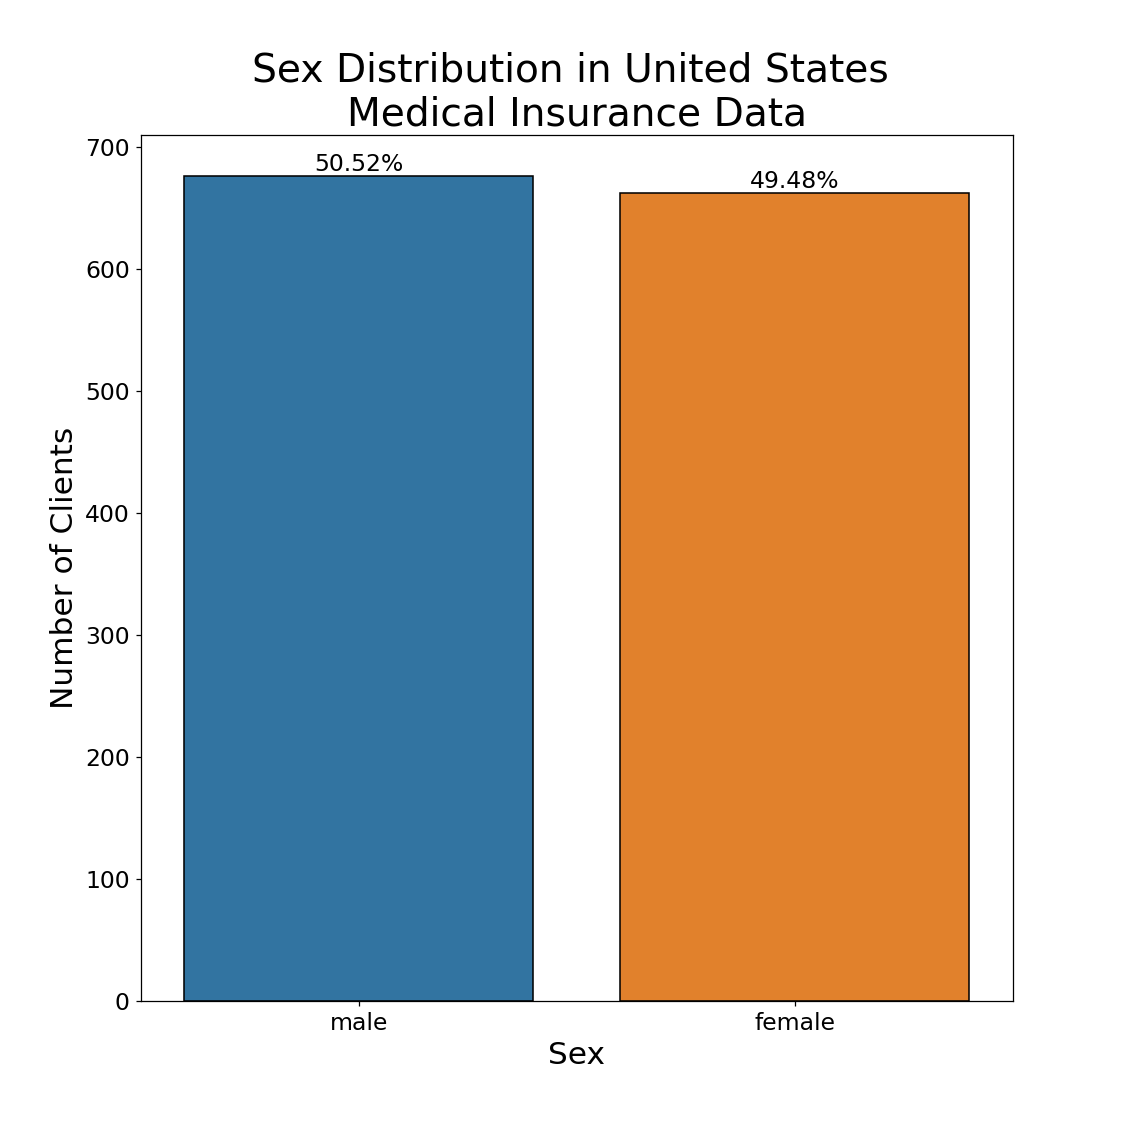

<IPython.core.display.Javascript object>


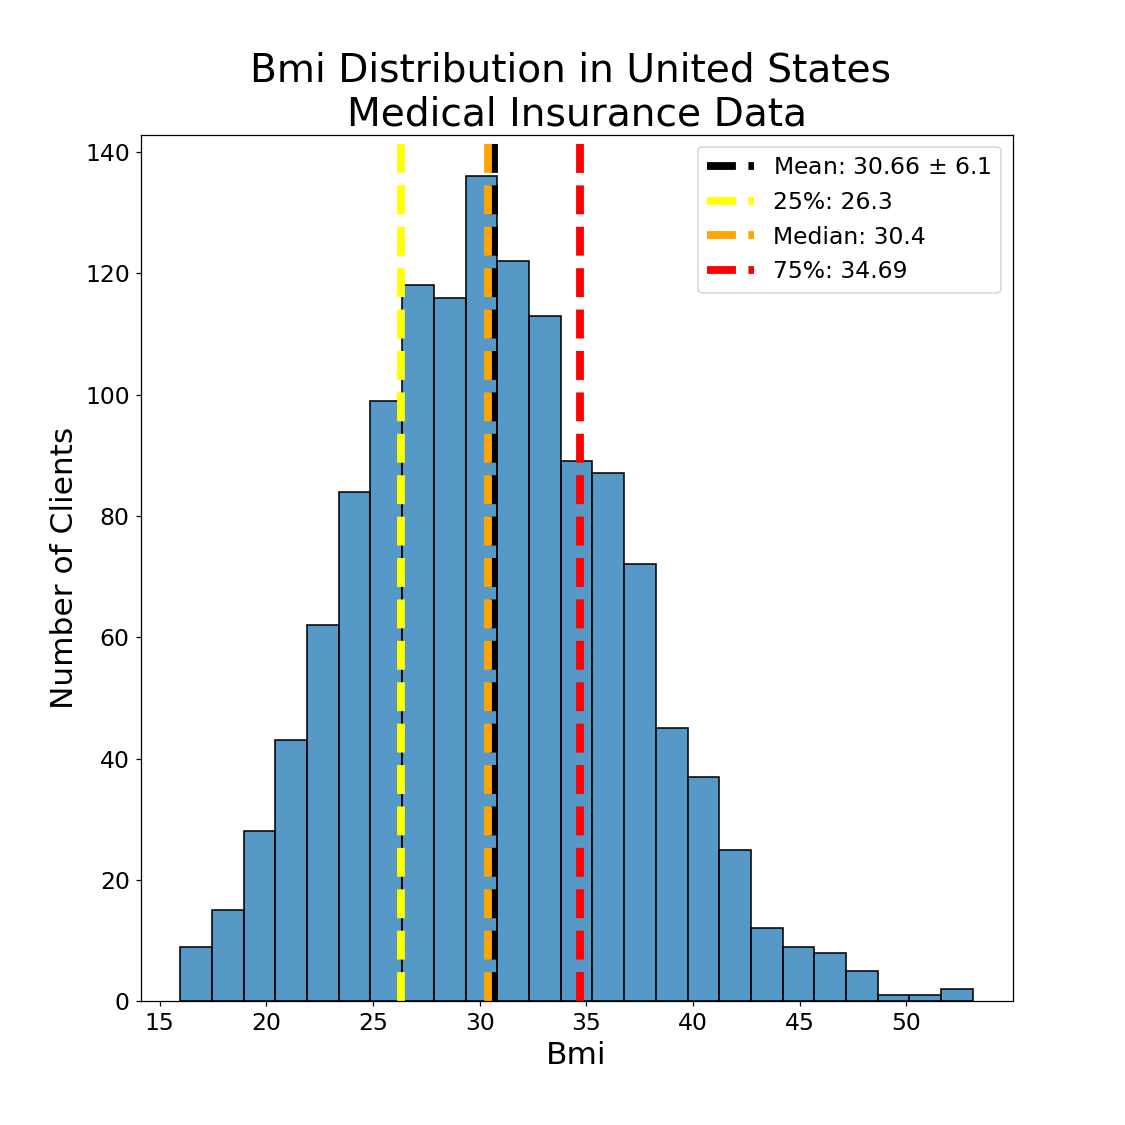

<IPython.core.display.Javascript object>


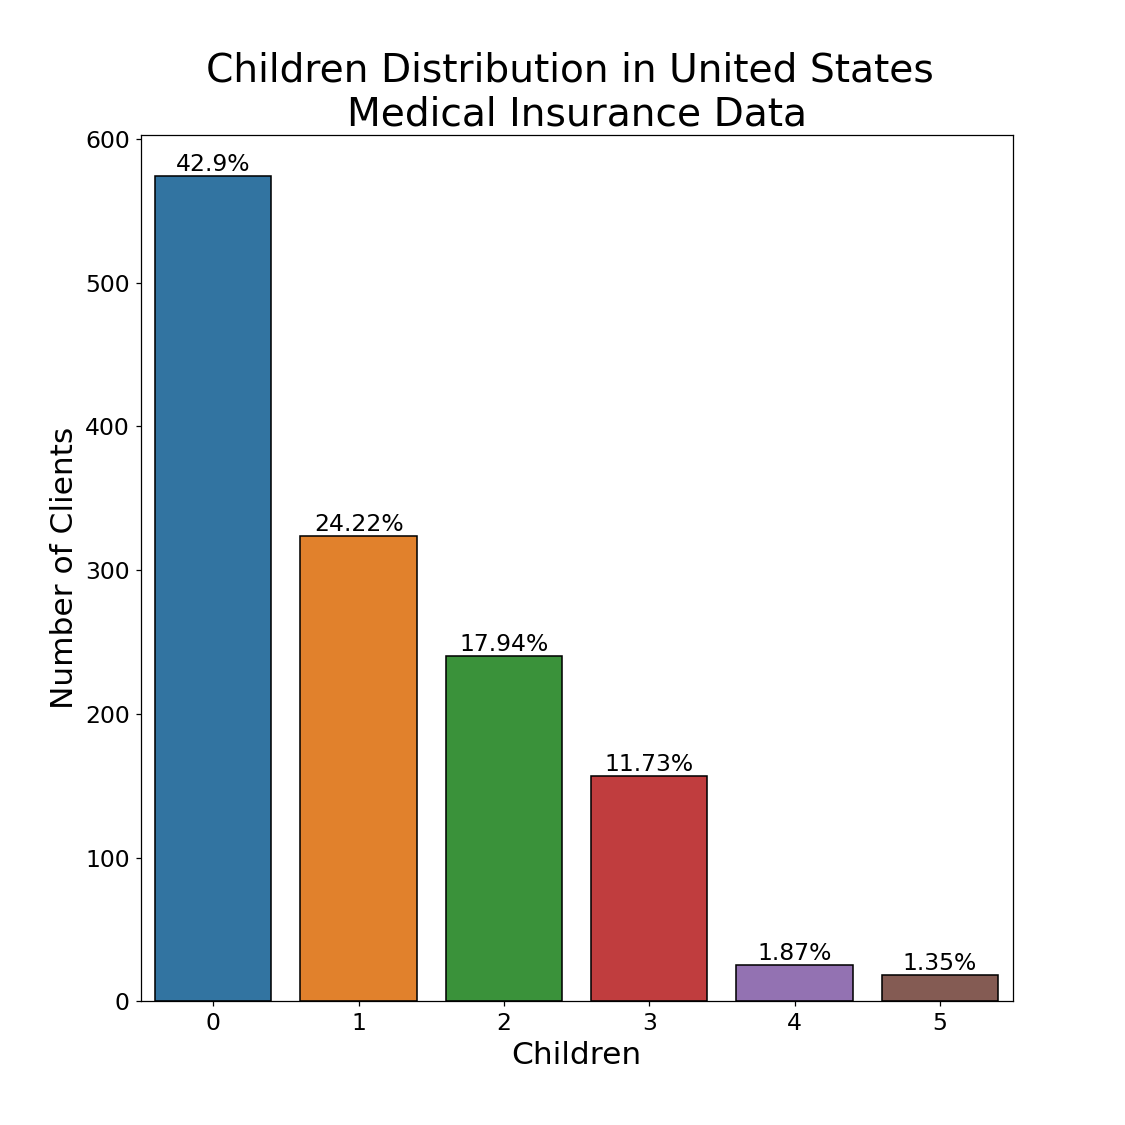

<IPython.core.display.Javascript object>


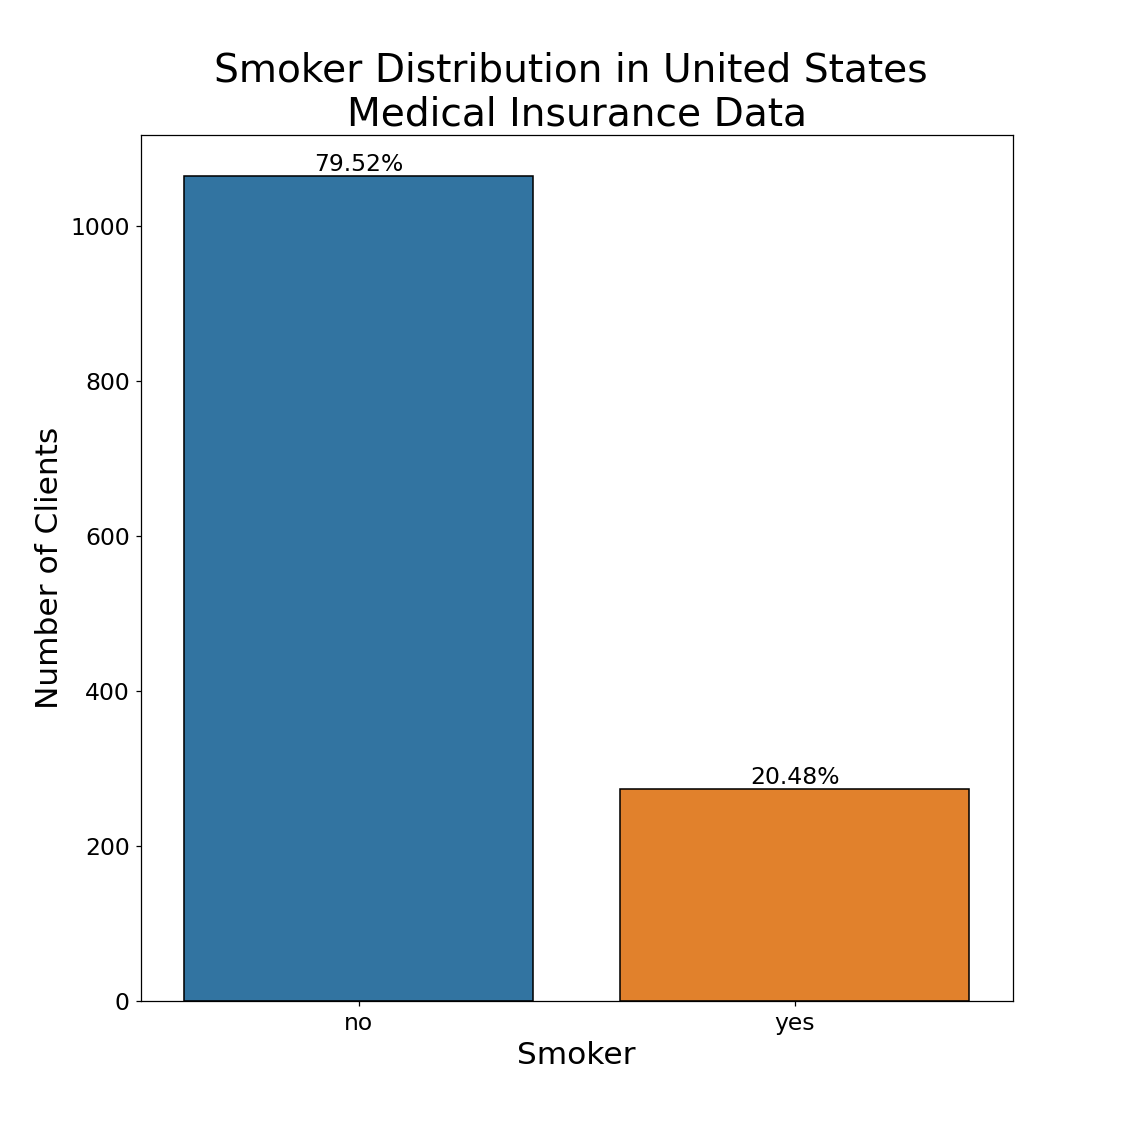

<IPython.core.display.Javascript object>


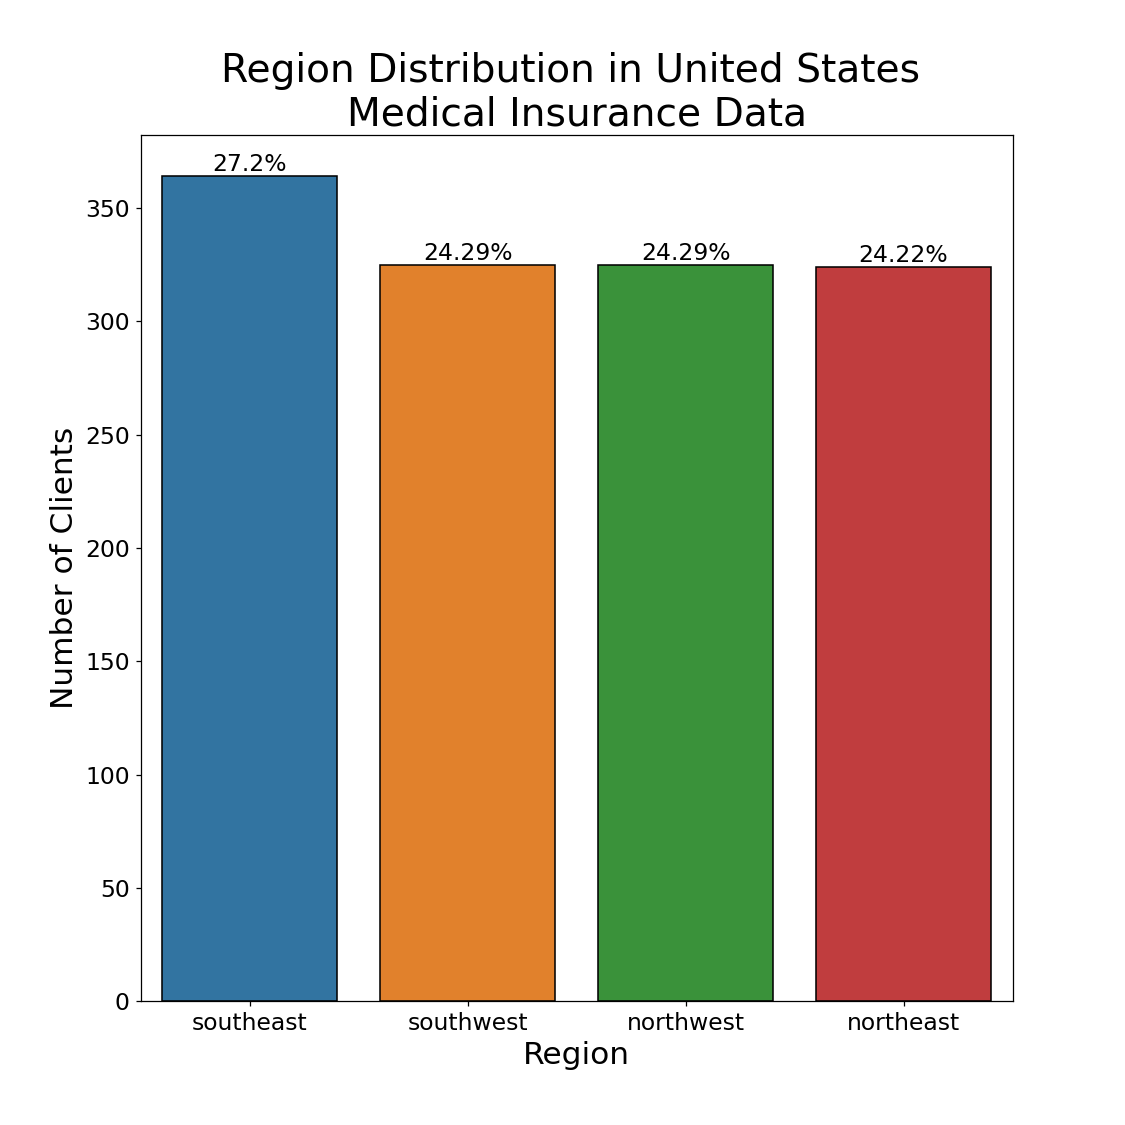

<IPython.core.display.Javascript object>


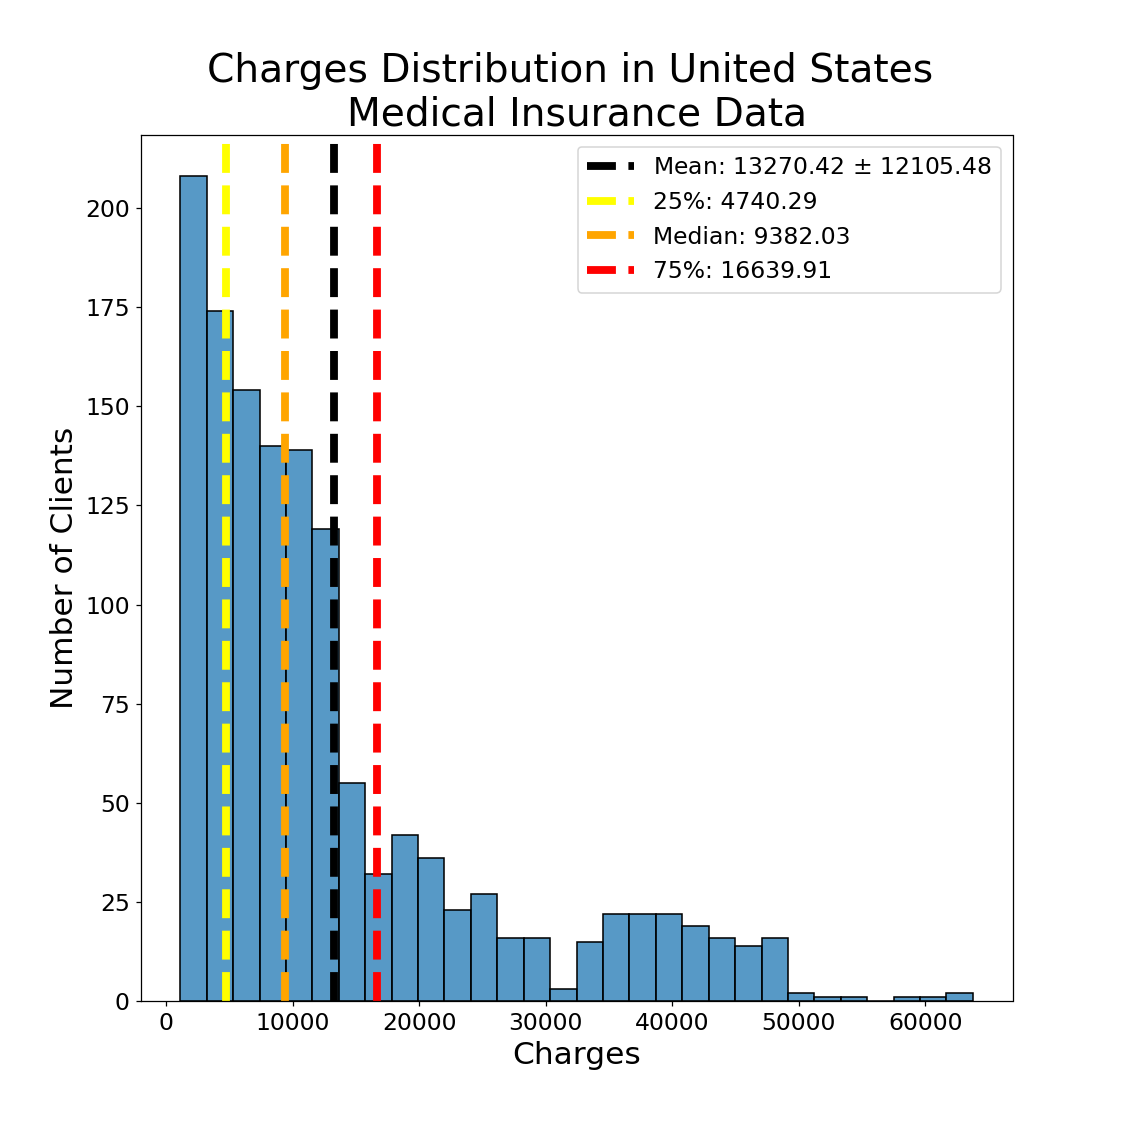

In [7]:
dist_viz(insurance_df)

From the above, I can conclude the following:

- `age`: The age data is approximately distributed within its range.
- `sex`: The sex data is approximately evenly distributed. Males and females are are equally represented in the data.
- `bmi`: The bmi data displays and approximately normal, unimodal distribution.
- `children`: The modal number of children represented in the data is zero children. The proportion of the dataset that has a given number of children decreases as the number of children increases.
- `smoker`: The vast majority of the dataset does not smoke.
- `region`: Each region is approximately equally represented, with a slight preference to the southeast region.
- `charges`: The charges data displays a prominent right-skewed distribution.

### 3.3 Multivariate Analysis

Now that I have a grasp of how the data is distributed, I would now like to get a look at how each of my predictors relates to the charges. Before I do that, I will need to encode the categorical variables so they can be passed to the `.corr()` method to create a heatmap.

In [8]:
insurance_ohe = pd.get_dummies(insurance_df, drop_first = True)

insurance_ohe.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<IPython.core.display.Javascript object>


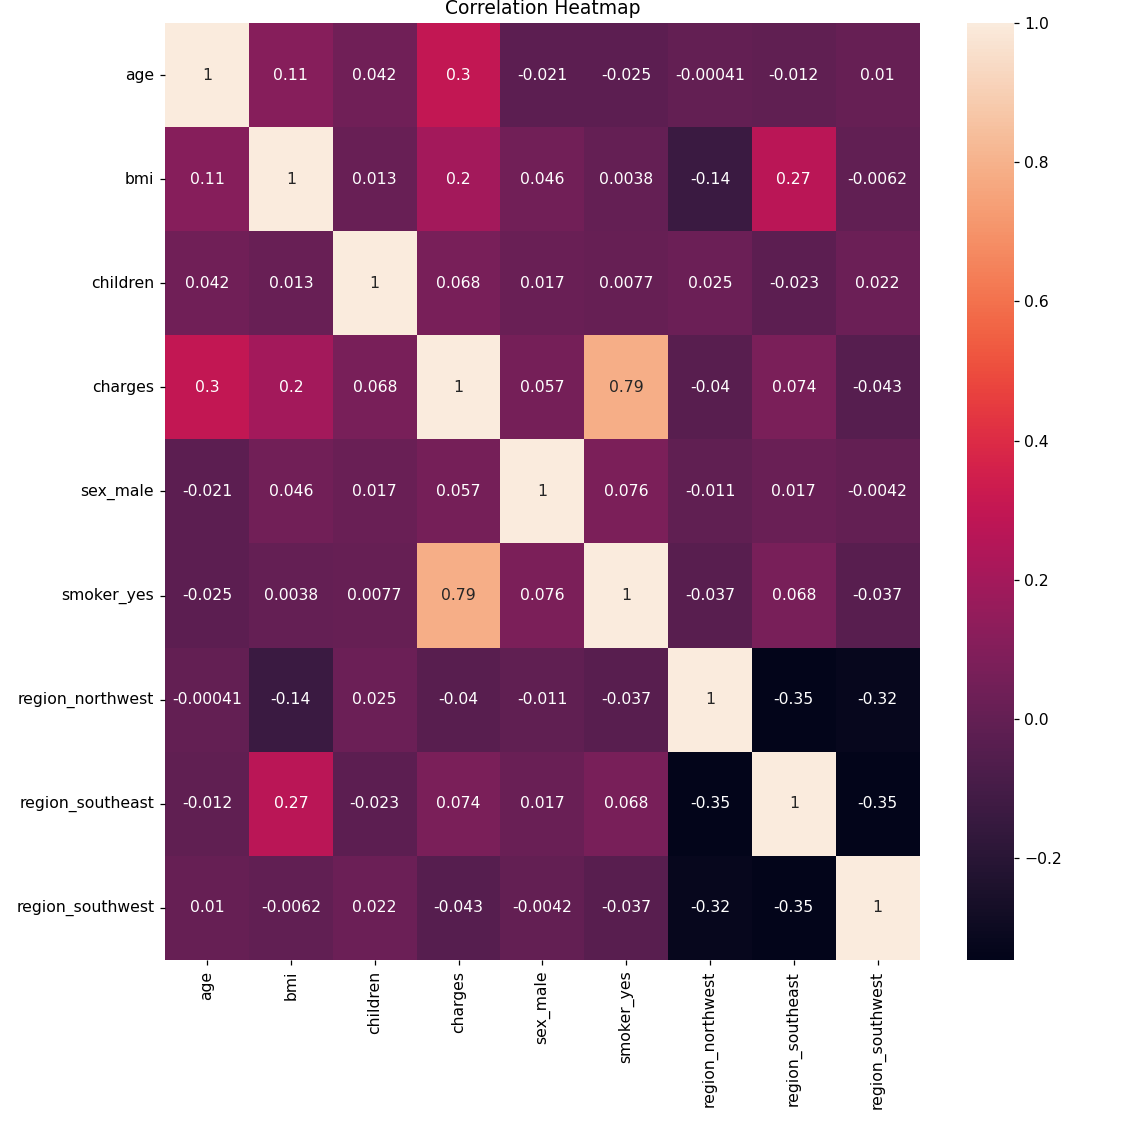

C:\Users\zcron\AppData\Local\Temp\ipykernel_24248\1593724281.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbx_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('corr_heatmap.png', bbx_inches = 'tight')


In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(
    insurance_ohe.corr(),
    annot = True
)
plt.tight_layout()
plt.title('Correlation Heatmap')
plt.savefig('corr_heatmap.png', bbx_inches = 'tight')
plt.show()

The correlation heatmap above shows that charges is most strongly related to the smoker status of the client. Age and bmi data also appear to be somewhat related to the charges paid. The other features do not appear to have a strong relation. This is not necessarily conclusive however. This analysis uses Pearson Correlation and thus only shows if the data are linearly related. More complexe relationships or combination of features may still be predictive.

<IPython.core.display.Javascript object>


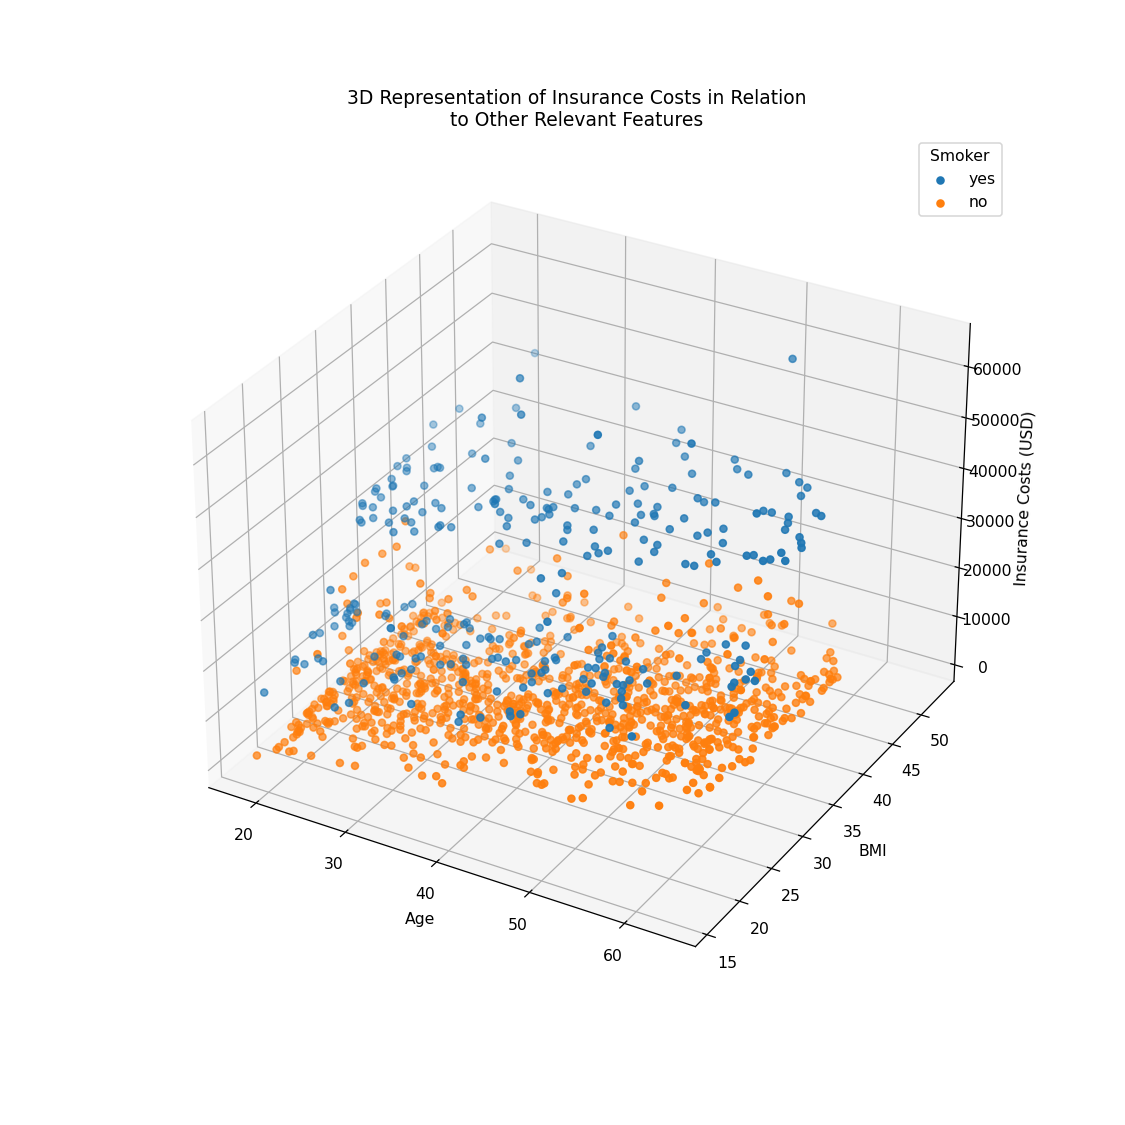

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111, projection = '3d')

ax.scatter(insurance_df[insurance_df.smoker == 'yes'].age, insurance_df[insurance_df.smoker == 'yes'].bmi,
            insurance_df[insurance_df.smoker == 'yes'].charges, label = 'yes')
ax.scatter(insurance_df[insurance_df.smoker == 'no'].age, insurance_df[insurance_df.smoker == 'no'].bmi,
            insurance_df[insurance_df.smoker == 'no'].charges, label = 'no')
plt.legend(title = 'Smoker')
ax.set_ylabel('BMI')
ax.set_xlabel('Age')
ax.set_zlabel('Insurance Costs (USD)')
ax.set_title('3D Representation of Insurance Costs in Relation\nto Other Relevant Features')
plt.savefig('threeD_plot.png')
plt.show()

By plotting the data in this way, I can see that the three groups can be separated into three groups. Those who don't smoke, those who do with bmi < 30 and those who do with bmi > 30.

## 4 Building a Predictive Model

I will not be attempting a linear model on this data. The above plots show that the predictors are not linearly related to the outcome. I will start with a support vector regressor.

### 4.1 Using a Support Vector Regressor

In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

X = insurance_ohe.drop(columns = 'charges')
y = insurance_ohe['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

svr = SVR()
svr.fit(X_train, y_train)

print(f'Train Score: {svr.score(X_train, y_train)}')
print(f'Test Score: {svr.score(X_test, y_test)}')

Train Score: -0.10722865987300545
Test Score: -0.11574027537461551


In [12]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
X_mm = mmscaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_mm, y, test_size = 0.2, random_state = 1)

svr = SVR()
svr.fit(X_train, y_train)

print(f'Train Score: {svr.score(X_train, y_train)}')
print(f'Test Score: {svr.score(X_test, y_test)}')

Train Score: -0.10315922843973224
Test Score: -0.11170439952950151


Regardless if scaling, the support vector regressor cannot fit the data. I will move onto a Random Forest Regressor.

### 4.2 Using a Random Forest Regression Model

In [14]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

print(f'Train Score: {rfr.score(X_train, y_train)}')
print(f'Test Score: {rfr.score(X_test, y_test)}')

Train Score: 0.9760214086068807
Test Score: 0.8313066790367525


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [i for i in range(1, 20)]}

rfr_gs = GridSearchCV(
    rfr,
    param_grid = param_grid,
    return_train_score = True,
    cv = 5
)

rfr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             return_train_score=True)

In [16]:
print(rfr_gs.best_estimator_)
print(rfr_gs.best_score_)

RandomForestRegressor(max_depth=4)
0.8517956268630625


In [17]:
best_rfr = RandomForestRegressor(**rfr_gs.best_params_)
best_rfr.fit(X_train, y_train)

print(f'Train Score: {best_rfr.score(X_train, y_train)}')
print(f'Test Score: {best_rfr.score(X_test, y_test)}')

Train Score: 0.8778401507649402
Test Score: 0.8570366238811985


In [18]:
print(best_rfr.feature_importances_)

[1.09070107e-01 1.62389311e-01 7.83123763e-03 2.48347384e-04
 7.19889178e-01 2.38379258e-04 2.65024372e-04 6.84151102e-05]


In [19]:
print(best_rfr.feature_names_in_)

['age' 'bmi' 'children' 'sex_male' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']


In [20]:
fi_df = pd.DataFrame({'features': best_rfr.feature_names_in_, 'feature_importances': best_rfr.feature_importances_}).sort_values(by = 'feature_importances', ascending = False)

fi_df

,features,feature_importances
4,smoker_yes,0.719889
1,bmi,0.162389
0,age,0.109070
2,children,0.007831
6,region_southeast,0.000265
3,sex_male,0.000248
5,region_northwest,0.000238
7,region_southwest,0.000068


<IPython.core.display.Javascript object>


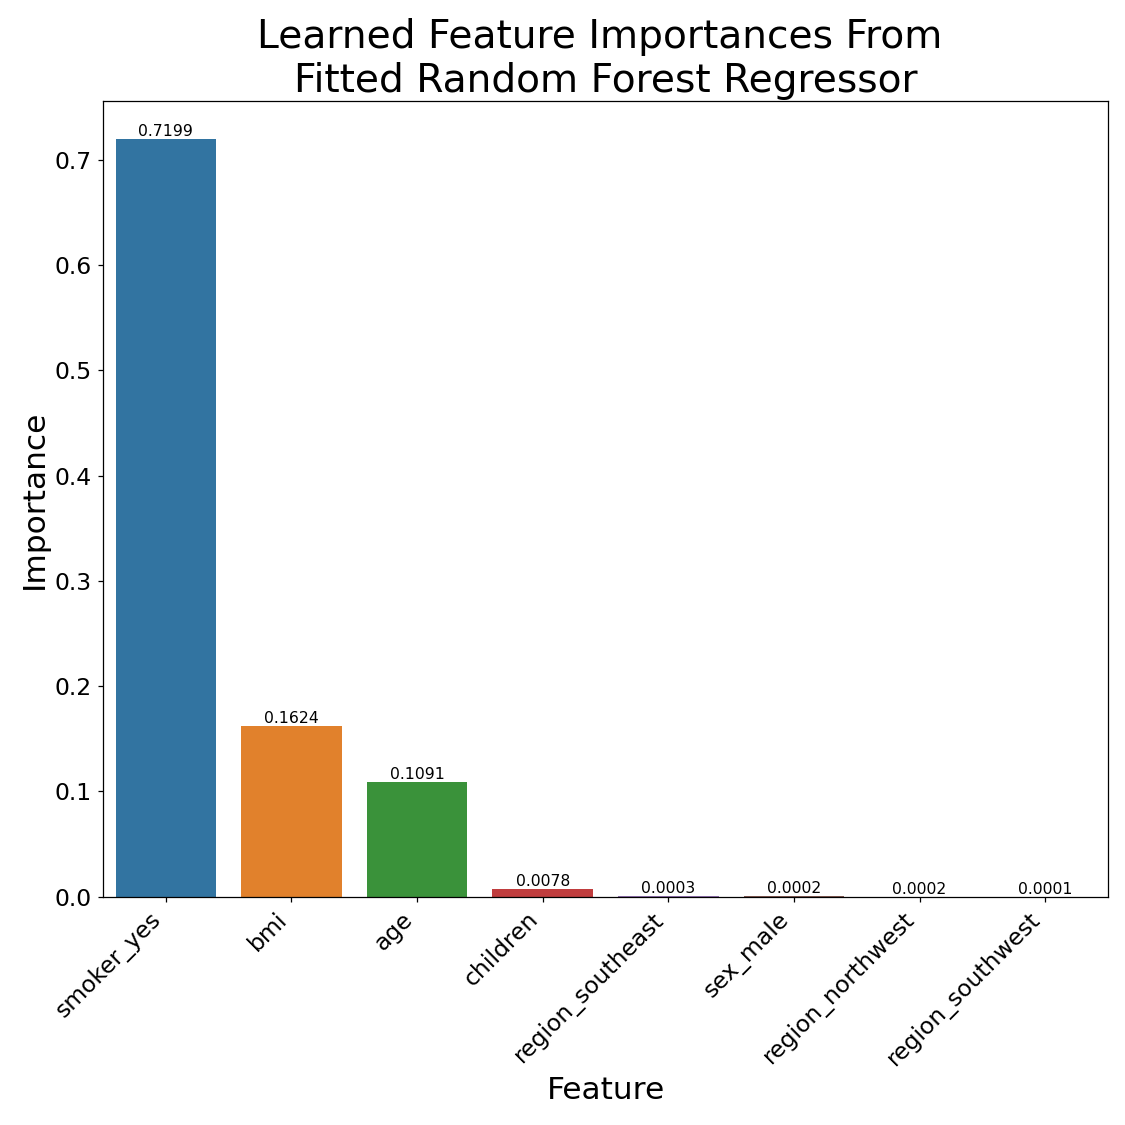

In [21]:
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(
    y = fi_df['feature_importances'],
    x = fi_df['features'],
    ax = ax
)
ax.bar_label(container=ax.containers[0], labels = fi_df['feature_importances'].round(4), size = 10)
plt.xticks(rotation = 45, ha = 'right')
ax.set_title('Learned Feature Importances From \nFitted Random Forest Regressor', fontsize = 25)
ax.set_ylabel('Importance', fontsize = 20)
ax.set_xlabel('Feature', fontsize = 20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.tight_layout()
plt.savefig('learn_imp_rfr.png')
plt.show()

<IPython.core.display.Javascript object>


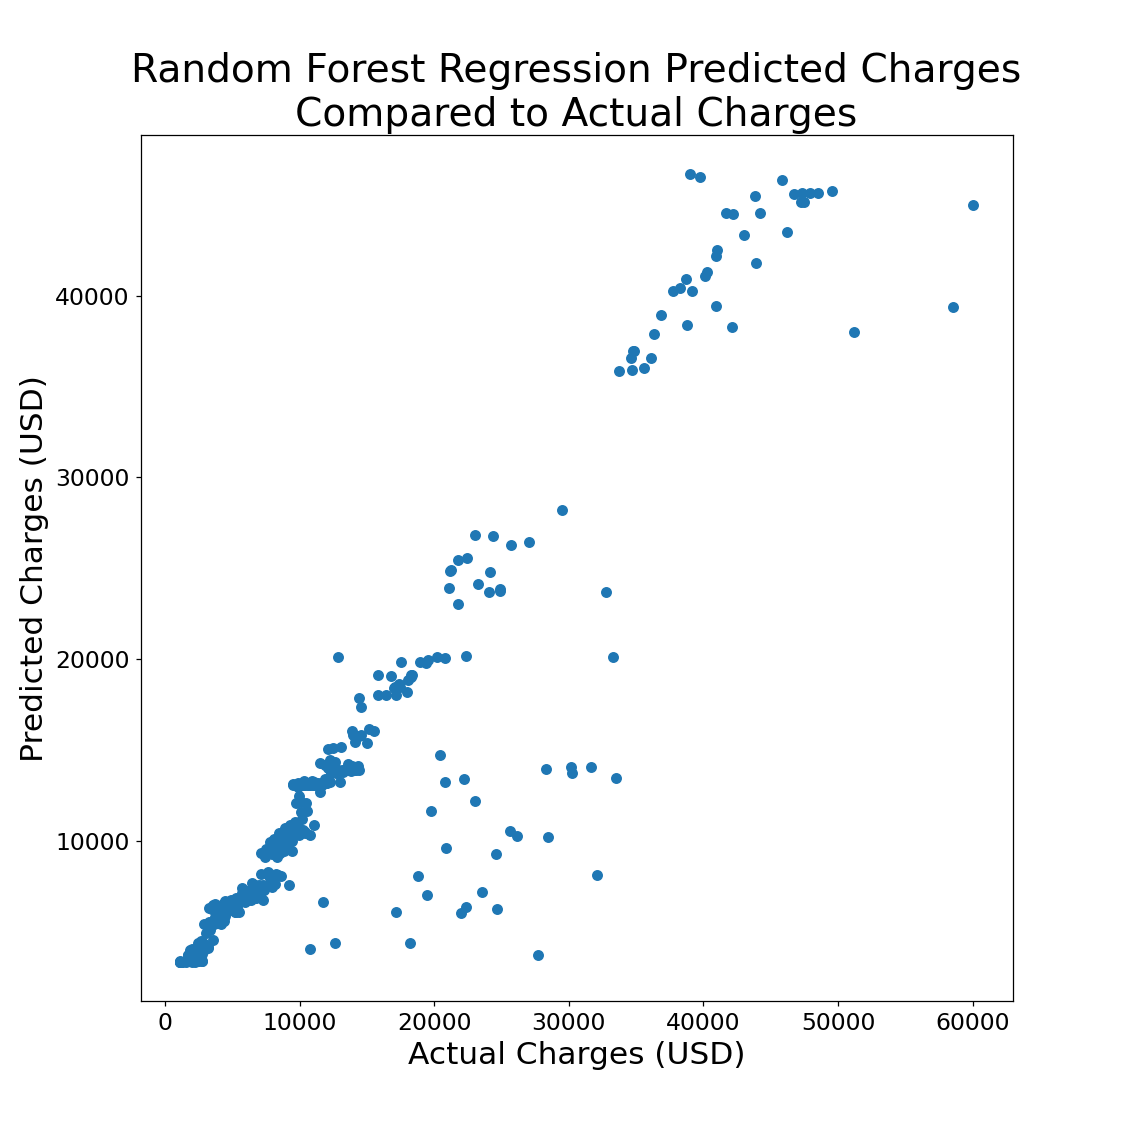

In [22]:
y_pred = best_rfr.predict(X_test)
plt.figure(figsize = (10,10))
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted Charges (USD)', fontsize = 20)
plt.xlabel('Actual Charges (USD)', fontsize = 20)
plt.title('Random Forest Regression Predicted Charges\nCompared to Actual Charges', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('rfr_y_comp.png')
plt.show()

With and R$^2$ score of ~0.86 on the testing set, this random forest regressor is performing quite well. But could I improve it? As I said before, there appears to be three distinct groups in the age vs. charges data. This is a job for unsupervised clustering. I will use KMeans clustering.

### 4.3 Added Labels to Unknown Clusters

In [23]:
from sklearn.cluster import KMeans

means_df = insurance_ohe[['age', 'bmi', 'smoker_yes', 'charges']]

km_model = KMeans(n_clusters = 3, random_state = 1)
km_model.fit(means_df)

print(km_model.labels_[:5])

[2 0 0 2 0]


In [24]:
kmeans_labels = km_model.labels_

insurance_ohe['kmeans'] = kmeans_labels
insurance_ohe.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,kmeans
0,19,27.900,0,16884.92400,0,1,0,0,1,2
1,18,33.770,1,1725.55230,1,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,2
4,32,28.880,0,3866.85520,1,0,1,0,0,0


<IPython.core.display.Javascript object>


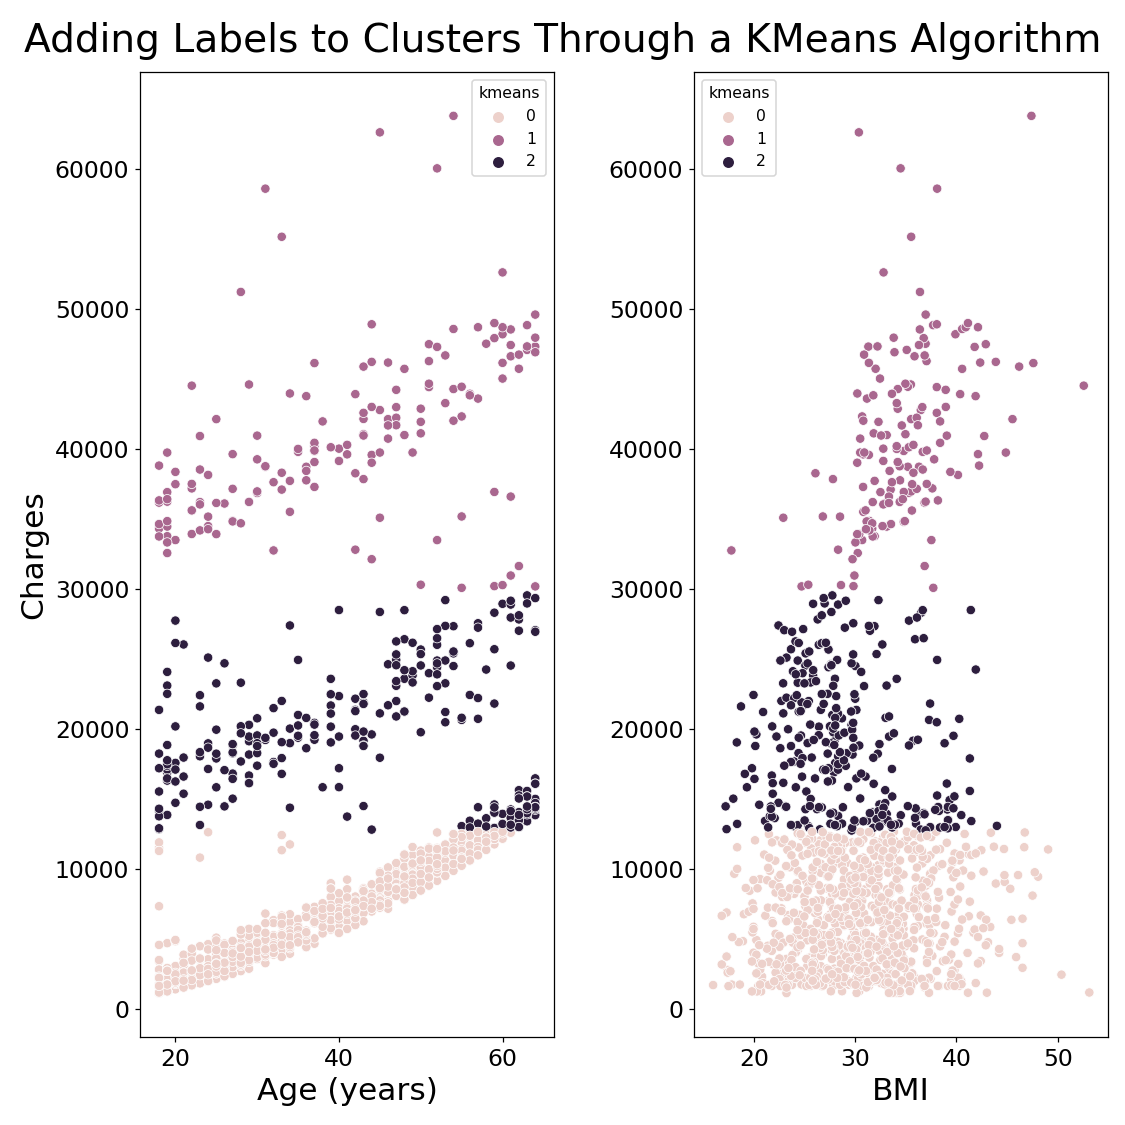

In [25]:
fig, axes = plt.subplots(1,2,figsize = (10,10))

sns.scatterplot(
    x = 'age',
    y = 'charges',
    data = insurance_ohe,
    hue = 'kmeans',
    ax = axes[0]
)
axes[0].set_xlabel('Age (years)', fontsize = 20)
axes[0].set_ylabel('Charges', fontsize = 20)
axes[0].tick_params(axis = 'both', which = 'major', labelsize = 15)

sns.scatterplot(
    x = 'bmi',
    y = 'charges',
    data = insurance_ohe,
    hue = 'kmeans',
    ax = axes[1]
)
axes[1].set_xlabel('BMI', fontsize = 20)
axes[1].set_ylabel(' ', fontsize = 20)
axes[1].tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.suptitle('Adding Labels to Clusters Through a KMeans Algorithm', fontsize = 25)
plt.tight_layout()
plt.savefig('added_kmeans.png')
plt.show()

In [26]:
X = insurance_ohe.drop(columns = 'charges')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

param_grid = {'max_depth': [i for i in range(1, 20)]}

rfr_gs = GridSearchCV(
    rfr,
    param_grid = param_grid,
    return_train_score = True,
    cv = 5
)

rfr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             return_train_score=True)

In [27]:
print(rfr_gs.best_estimator_)
print(rfr_gs.best_score_)

RandomForestRegressor(max_depth=9)
0.9580168003021704


In [28]:
best_rfr = RandomForestRegressor(**rfr_gs.best_params_)
best_rfr.fit(X_train, y_train)

print(f'Train Score: {best_rfr.score(X_train, y_train)}')
print(f'Test Score: {best_rfr.score(X_test, y_test)}')

Train Score: 0.9929895082615338
Test Score: 0.9653120827450532


In [29]:
fi_df = pd.DataFrame({'features': best_rfr.feature_names_in_, 'feature_importances': best_rfr.feature_importances_}).sort_values(by = 'feature_importances', ascending = False)

fi_df

,features,feature_importances
8,kmeans,0.595309
4,smoker_yes,0.299829
0,age,0.076011
1,bmi,0.020054
2,children,0.004965
6,region_southeast,0.001363
3,sex_male,0.001110
5,region_northwest,0.000830
7,region_southwest,0.000527


<IPython.core.display.Javascript object>


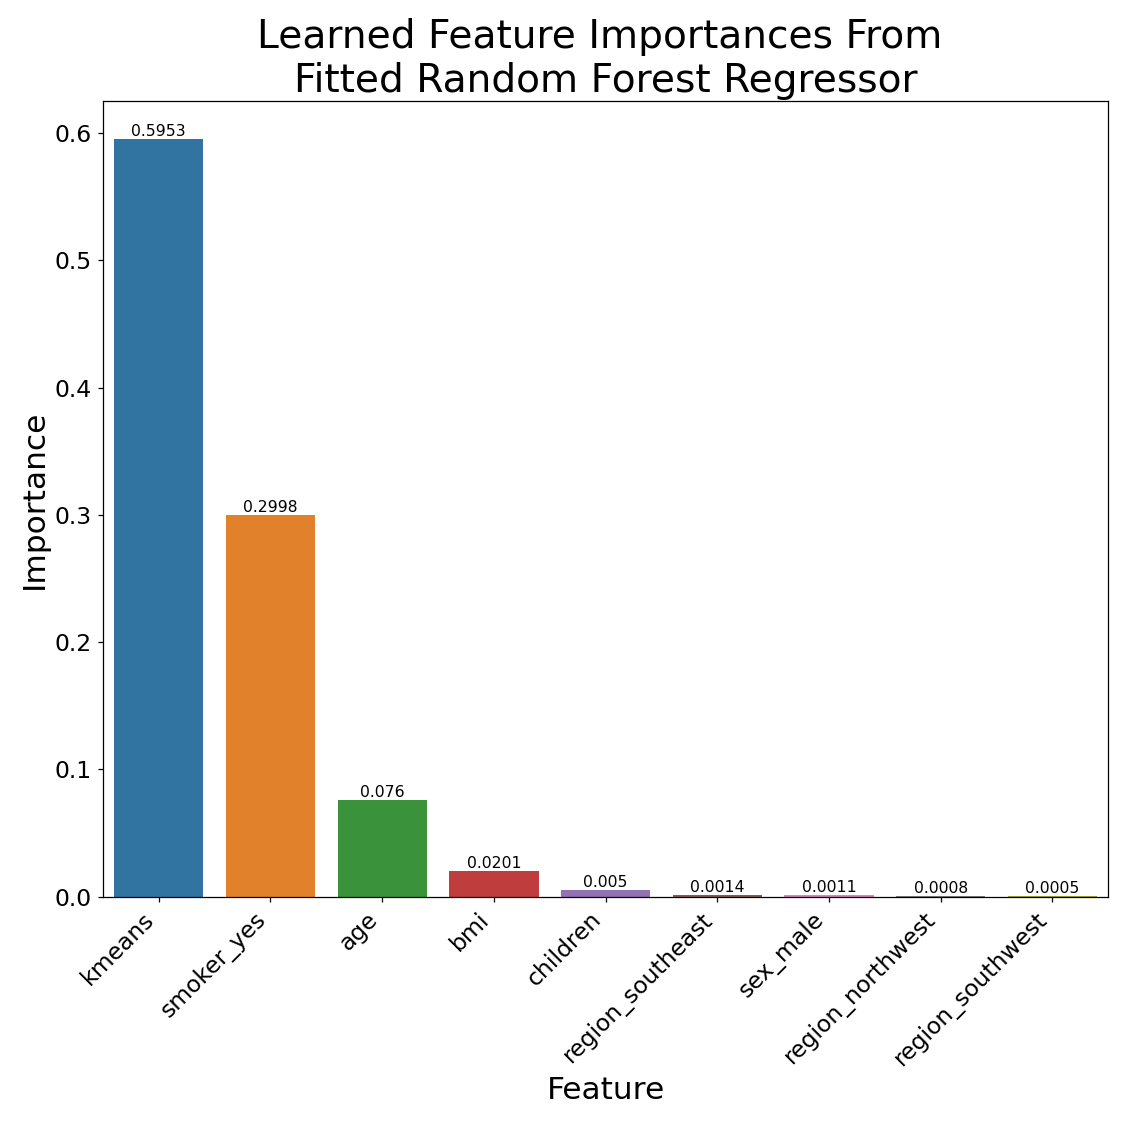

In [30]:
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(
    y = fi_df['feature_importances'],
    x = fi_df['features'],
    ax = ax
)
ax.bar_label(container=ax.containers[0], labels = fi_df['feature_importances'].round(4), size = 10)
plt.xticks(rotation = 45, ha = 'right')
ax.set_title('Learned Feature Importances From \nFitted Random Forest Regressor', fontsize = 25)
ax.set_ylabel('Importance', fontsize = 20)
ax.set_xlabel('Feature', fontsize = 20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.tight_layout()
plt.savefig('f_imp_w_kmeans.png')
plt.show()

<IPython.core.display.Javascript object>


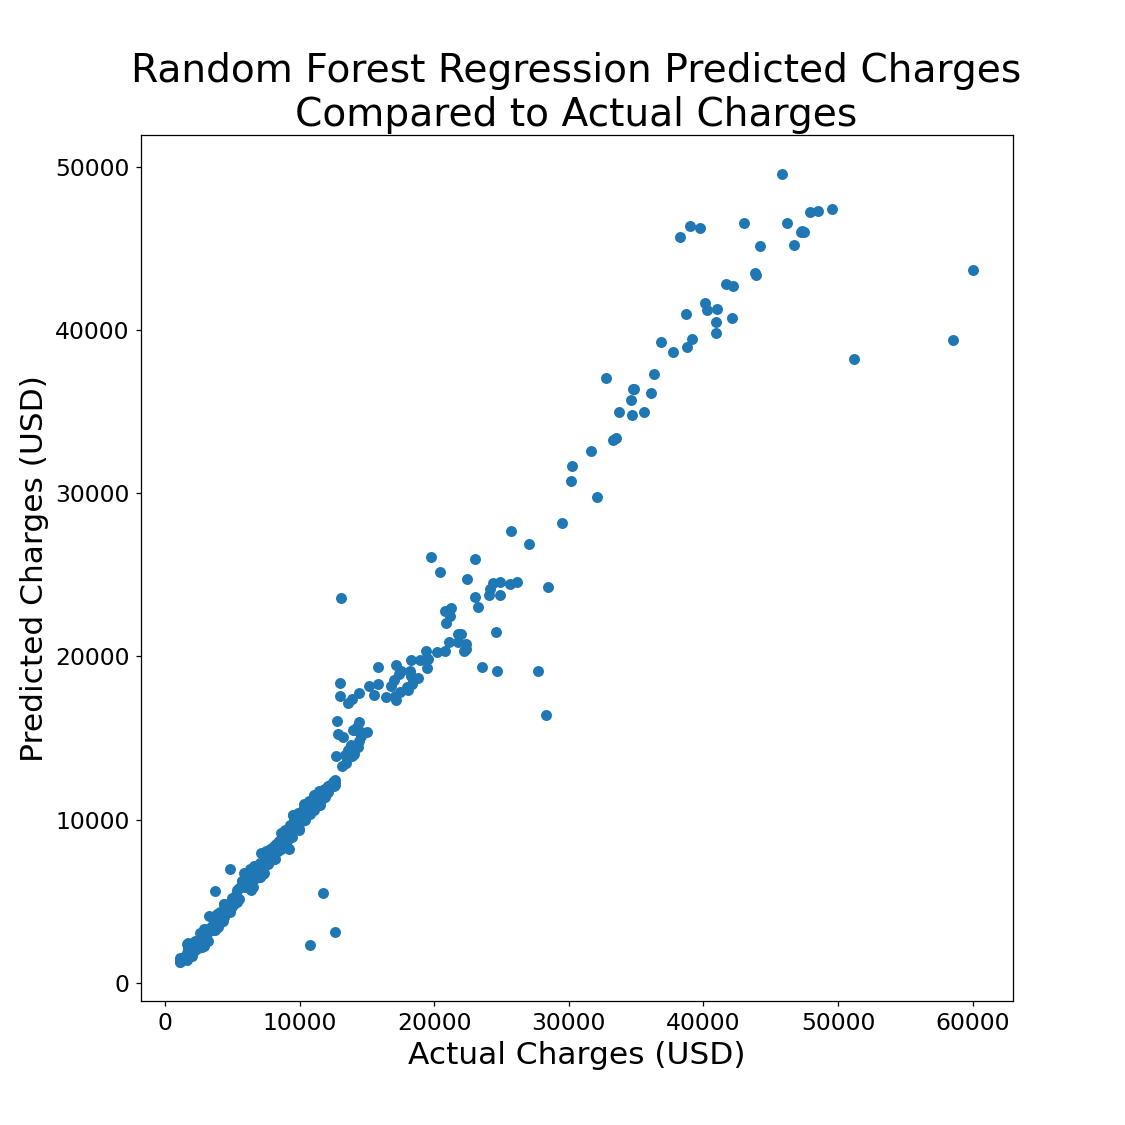

In [31]:
y_pred = best_rfr.predict(X_test)
plt.figure(figsize = (10,10))
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted Charges (USD)', fontsize = 20)
plt.xlabel('Actual Charges (USD)', fontsize = 20)
plt.title('Random Forest Regression Predicted Charges\nCompared to Actual Charges', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('rfr_y_results_w_kmeans.png')
plt.show()

While the Kmeans clustering does not do a perfect job of clusting the age and bmi vs. charges data, it improved my regressor significantly. With and and R$^2$ of 0.96 on the testing set, this model is about as accurate as it can get.

## 5 Conclusions

In this project, a simulated medical insurance dataset was analyzed and used to develop a predictive model. Upon initial inspection, the data was found to be clean and tidy, with one hot encoding being the only feature manipulation required prior to model deployment. Of the six predictor features (age, bmi, sex, smoker status and region), age, bmi and smoker status were found to be the most influential on the outcome feature of charges paid. 

A first attempt at training a Support Vector regressor resulted in a model completely incapable of predicting the training data and test data. A random forest regressor was found to be more appropriate. Using a five-fold cross-validation grid search resulted in an optimal random forest regressor with a max depth of 4. This regressor produced predicted insurances costs with a correlation coefficient of R$^2$ = 0.86 when compared to the test set outcomes. The model was then improved by added learned KMeans clustering labels to the dataset. The new max depth was found to be 5 and corresponded to an R$^2$ of 0.96.